In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv('data/country_names_area.csv')
# only taking country_are
pd.read_csv('data/midyear_population_5yr_age_sex.csv')
pd.read_csv('data/midyear_population.csv')

births = pd.read_csv('data/birth_death_growth_rates.csv')
fertility = pd.read_csv('data/age_specific_fertility_rates.csv')
# Taking gross repro rate 3 ranges
mortality = pd.read_csv('data/mortality_life_expectancy.csv')
# taking out 0 to 4 mortality
births

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate
0,SI,Slovenia,2036,7.59,14.65,0.23,-0.706,-0.682
1,SI,Slovenia,2022,7.52,12.28,0.32,-0.476,-0.444
2,SI,Slovenia,2023,7.43,12.41,0.31,-0.498,-0.467
3,SI,Slovenia,2024,7.35,12.55,0.31,-0.520,-0.489
4,SI,Slovenia,2025,7.30,12.68,0.30,-0.538,-0.508
...,...,...,...,...,...,...,...,...
15104,BP,Solomon Islands,2000,34.93,4.53,-2.51,3.040,2.789
15105,BP,Solomon Islands,1999,35.48,4.61,-2.58,3.087,2.829
15106,BP,Solomon Islands,1998,35.98,4.70,-2.45,3.128,2.884
15107,BP,Solomon Islands,1997,36.44,4.79,-2.31,3.165,2.934


Deleting unimportant features in mortality and Fertility

In [4]:
mortality.drop(['mortality_rate_1to4', 'mortality_rate_1to4_male', 'mortality_rate_1to4_female'], axis=1, inplace=True)
mortality

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,25.68,29.05,22.13,71.28,68.86,73.81,32.31,36.33,28.08
15102,BP,Solomon Islands,1999,26.55,30.01,22.91,70.99,68.59,73.51,33.49,37.61,29.15
15103,BP,Solomon Islands,1998,27.45,31.01,23.71,70.70,68.32,73.20,34.71,38.94,30.26
15104,BP,Solomon Islands,1997,28.38,32.04,24.54,70.40,68.04,72.88,35.97,40.32,31.40


In [5]:
fertility.drop('gross_reproduction_rate',axis=1, inplace=True)
fertility

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,1.0661
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,1.0660
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,1.0660
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,1.0661
...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,4.6300,1.0501
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,4.7360,1.0500
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,4.8420,1.0500
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,4.9480,1.0499


In [6]:
pop_changes = pd.merge(fertility, births, on = ['country_code', 'country_name', 'year'], how = 'left')

pop_changes = pd.merge(pop_changes, mortality, on = ['country_code', 'country_name', 'year'], how = 'left')

In [66]:
pop_changes

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,...,growth_rate,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,...,-0.682,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,...,-0.444,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,...,-0.467,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,...,-0.489,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,...,-0.508,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,...,2.789,25.68,29.05,22.13,71.28,68.86,73.81,32.31,36.33,28.08
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,...,2.829,26.55,30.01,22.91,70.99,68.59,73.51,33.49,37.61,29.15
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,...,2.884,27.45,31.01,23.71,70.70,68.32,73.20,34.71,38.94,30.26
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,...,2.934,28.38,32.04,24.54,70.40,68.04,72.88,35.97,40.32,31.40


Aggregating Fertility rates to <20, 20 to 40, and 40+

In [7]:
pop_changes['fertility_rate_40+'] = pop_changes['fertility_rate_40_44'] + pop_changes['fertility_rate_45_49']
pop_changes['fertility_rate_20_to_40'] = pop_changes['fertility_rate_20_24'] + pop_changes['fertility_rate_25_29'] + pop_changes['fertility_rate_30_34'] + pop_changes['fertility_rate_35_39']
pop_changes['fertility_rate_Under_20'] = pop_changes['fertility_rate_15_19']
pop_changes

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,...,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,fertility_rate_40+,fertility_rate_20_to_40,fertility_rate_Under_20
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,...,3.00,80.90,77.51,84.52,3.93,4.39,3.44,12.5,290.5,8.5
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,...,3.27,79.11,75.58,82.89,4.43,5.02,3.81,8.7,264.7,7.5
2,SI,Slovenia,2023,7.6,56.5,106.6,76.2,27.2,6.6,2.4,...,3.25,79.26,75.73,83.02,4.39,4.97,3.78,9.0,266.5,7.6
3,SI,Slovenia,2024,7.7,56.8,107.0,77.1,27.5,6.7,2.5,...,3.22,79.40,75.89,83.15,4.35,4.91,3.74,9.2,268.4,7.7
4,SI,Slovenia,2025,7.7,56.9,107.4,78.0,27.7,6.9,2.6,...,3.20,79.55,76.04,83.29,4.31,4.86,3.71,9.5,270.0,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,80.4,197.7,232.8,196.5,132.5,65.3,20.9,...,22.13,71.28,68.86,73.81,32.31,36.33,28.08,86.2,759.5,80.4
15102,BP,Solomon Islands,1999,82.9,202.6,237.0,200.1,135.9,67.2,21.5,...,22.91,70.99,68.59,73.51,33.49,37.61,29.15,88.7,775.6,82.9
15103,BP,Solomon Islands,1998,85.5,207.5,241.1,203.7,139.3,69.1,22.2,...,23.71,70.70,68.32,73.20,34.71,38.94,30.26,91.3,791.6,85.5
15104,BP,Solomon Islands,1997,88.0,212.4,245.3,207.4,142.7,71.0,22.9,...,24.54,70.40,68.04,72.88,35.97,40.32,31.40,93.9,807.8,88.0


In [77]:
#Final dataset
pop_changes_final = pop_changes.drop(['fertility_rate_15_19','fertility_rate_20_24', 'fertility_rate_25_29', 'fertility_rate_30_34',
       'fertility_rate_35_39', 'fertility_rate_40_44', 'fertility_rate_45_49'], axis=1)


Index(['country_code', 'country_name', 'year', 'total_fertility_rate',
       'sex_ratio_at_birth', 'crude_birth_rate', 'crude_death_rate',
       'net_migration', 'rate_natural_increase', 'growth_rate',
       'infant_mortality', 'infant_mortality_male', 'infant_mortality_female',
       'life_expectancy', 'life_expectancy_male', 'life_expectancy_female',
       'mortality_rate_under5', 'mortality_rate_under5_male',
       'mortality_rate_under5_female', 'fertility_rate_40+',
       'fertility_rate_20_to_40', 'fertility_rate_Under_20'],
      dtype='object')


In [73]:
#Creating new region column, mapping country_name to new 'region'
#Asia', 'Caribbean', 'Central America', 'Europe', 'North America','Oceania', 'South America', Africa and Middle East
country_region_map = {
    'Aruba': 'Caribbean',
    'Antigua and Barbuda': 'Caribbean',
    'United Arab Emirates': 'Africa and Middle East',
    'Afghanistan': 'Asia',
    'Algeria': 'Africa and Middle East',
    'Azerbaijan': 'Asia',
    'Albania': 'Europe',
    'Armenia': 'Asia',
    'Andorra': 'Europe',
    'Angola': 'Africa and Middle East',
    'American Samoa': 'Oceania',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Anguilla': 'Caribbean',
    'Bahrain': 'Asia',
    'Barbados': 'Caribbean',
    'Botswana': 'Africa and Middle East',
    'Bermuda': 'North America',
    'Belgium': 'Europe',
    'Bahamas The': 'Caribbean',
    'Bangladesh': 'Asia',
    'Belize': 'Central America',
    'Bosnia and Herzegovina': 'Europe',
    'Bolivia': 'South America',
    'Burma': 'Asia',
    'Benin': 'Africa and Middle East',
    'Belarus': 'Europe',
    'Solomon Islands': 'Oceania',
    'Brazil': 'South America',
    'Bhutan': 'Asia',
    'Bulgaria': 'Europe',
    'Brunei': 'Asia',
    'Burundi': 'Africa and Middle East',
    'Canada': 'North America',
    'Cambodia': 'Asia',
    'Chad': 'Africa and Middle East',
    'Sri Lanka': 'Asia',
    'Congo (Brazzaville)': 'Africa and Middle East',
    'Congo (Kinshasa)': 'Africa and Middle East',
    'China': 'Asia',
    'Chile': 'South America',
    'Cayman Islands': 'Caribbean',
    'Cameroon': 'Africa and Middle East',
    'Comoros': 'Africa and Middle East',
    'Colombia': 'South America',
    'Northern Mariana Islands': 'Oceania',
    'Costa Rica': 'Central America',
    'Central African Republic': 'Africa and Middle East',
    'Cuba': 'Caribbean',
    'Cabo Verde': 'Africa and Middle East',
    'Cook Islands': 'Oceania',
    'Cyprus': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa and Middle East',
    'Dominica': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Ecuador': 'South America',
    'Egypt': 'Africa and Middle East',
    'Ireland': 'Europe',
    'Equatorial Guinea': 'Africa and Middle East',
    'Estonia': 'Europe',
    'Eritrea': 'Africa and Middle East',
    'El Salvador': 'Central America',
    'Ethiopia': 'Africa and Middle East',
    'Czechia': 'Europe',
    'Finland': 'Europe',
    'Fiji': 'Oceania',
    'Micronesia Federated States of': 'Oceania',
    'Faroe Islands': 'Europe',
    'French Polynesia': 'Oceania',
    'France': 'Europe',
    'Gambia The': 'Africa and Middle East',
    'Gabon': 'Africa and Middle East',
    'Georgia': 'Asia',
    'Ghana': 'Africa and Middle East',
    'Gibraltar': 'Europe',
    'Grenada': 'Caribbean',
    'Guernsey': 'Europe',
    'Greenland': 'North America',
    'Germany': 'Europe',
    'Guam': 'Oceania',
    'Greece': 'Europe',
    'Guatemala': 'Central America',
    'Guinea': 'Africa and Middle East',
    'Guyana': 'South America',
    'Gaza Strip': 'Africa and Middle East',
    'Haiti': 'Caribbean',
    'Hong Kong': 'Asia',
    'Honduras': 'Central America',
    'Croatia': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Indonesia': 'Asia',
    'Isle of Man': 'Europe',
    'India': 'Asia',
    'Iran': 'Asia',
    'Israel': 'Africa and Middle East',
    'Italy': 'Europe',
    "Cote d'Ivoire": 'Africa and Middle East',
    'Iraq': 'Africa and Middle East',
    'Japan': 'Asia',
    'Jersey': 'Europe',
    'Jamaica': 'Caribbean',
    'Jordan': 'Africa and Middle East',
    'Kenya': 'Africa and Middle East',
    'Kyrgyzstan': 'Asia',
    'Korea North': 'Asia',
    'Kiribati': 'Oceania',
    'Korea South': 'Asia',
    'Kuwait': 'Asia',
    'Kosovo': 'Europe',
    'Kazakhstan': 'Asia',
    'Laos': 'Asia',
    'Lebanon': 'Africa and Middle East',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Liberia': 'Africa and Middle East',
    'Slovakia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lesotho': 'Africa and Middle East',
    'Luxembourg': 'Europe',
    'Libya': 'Africa and Middle East',
    'Madagascar': 'Africa and Middle East',
    'Macau': 'Asia',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montserrat': 'Caribbean',
    'Malawi': 'Africa and Middle East',
    'Montenegro': 'Europe',
    'Macedonia': 'Europe',
    'Mali': 'Africa and Middle East',
    'Monaco': 'Europe',
    'Morocco': 'Africa and Middle East',
    'Mauritius': 'Africa and Middle East',
    'Mauritania': 'Africa and Middle East',
    'Malta': 'Europe',
    'Oman': 'Asia',
    'Maldives': 'Asia',
    'Mexico': 'North America',
    'Malaysia': 'Asia',
    'Mozambique': 'Africa and Middle East',
    'New Caledonia': 'Oceania',
    'Niger': 'Africa and Middle East',
    'Vanuatu': 'Oceania',
    'Nigeria': 'Africa and Middle East',
    'Netherlands': 'Europe',
    'Sint Maarten': 'Caribbean',
    'Norway': 'Europe',
    'Nepal': 'Asia',
    'Nauru': 'Oceania',
    'Suriname': 'South America',
    'Nicaragua': 'Central America',
    'New Zealand': 'Oceania',
    'South Sudan': 'Africa and Middle East',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Pakistan': 'Asia',
    'Poland': 'Europe',
    'Panama': 'Central America',
    'Portugal': 'Europe',
    'Papua New Guinea': 'Oceania',
    'Palau': 'Oceania',
    'Guinea-Bissau': 'Africa and Middle East',
    'Qatar': 'Asia',
    'Serbia': 'Europe',
    'Marshall Islands': 'Oceania',
    'Saint Martin': 'Caribbean',
    'Romania': 'Europe',
    'Philippines': 'Asia',
    'Puerto Rico': 'Caribbean',
    'Russia': 'Europe',
    'Rwanda': 'Africa and Middle East',
    'Saudi Arabia': 'Asia',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Kitts and Nevis': 'Caribbean',
    'Seychelles': 'Africa and Middle East',
    'South Africa': 'Africa and Middle East',
    'Senegal': 'Africa and Middle East',
    'Saint Helena': 'Africa and Middle East',
    'Slovenia': 'Europe',
    'Sierra Leone': 'Africa and Middle East',
    'San Marino': 'Europe',
    'Singapore': 'Asia',
    'Somalia': 'Africa and Middle East',
    'Spain': 'Europe',
    'Saint Lucia': 'Caribbean',
    'Sudan': 'Africa and Middle East',
    'Sweden': 'Europe',
    'Syria': 'Africa and Middle East',
    'Switzerland': 'Europe',
    'Saint Barthelemy': 'Caribbean',
    'Trinidad and Tobago': 'Caribbean',
    'Thailand': 'Asia',
    'Tajikistan': 'Asia',
    'Turks and Caicos Islands': 'Caribbean',
    'Tonga': 'Oceania',
    'Togo': 'Africa and Middle East',
    'Sao Tome and Principe': 'Africa and Middle East',
    'Tunisia': 'Africa and Middle East',
    'Timor-Leste': 'Asia',
    'Turkey': 'Europe',
    'Tuvalu': 'Oceania',
    'Taiwan': 'Asia',
    'Turkmenistan': 'Asia',
    'Tanzania': 'Africa and Middle East',
    'Curacao': 'Caribbean',
    'Uganda': 'Africa and Middle East',
    'United Kingdom': 'Europe',
    'Ukraine': 'Europe',
    'United States': 'North America',
    'Burkina Faso': 'Africa and Middle East',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Saint Vincent and the Grenadines': 'Caribbean',
    'Venezuela': 'South America',
    'Virgin Islands British': 'Caribbean',
    'Vietnam': 'Asia',
    'Virgin Islands U.S.': 'Caribbean',
    'Namibia': 'Africa and Middle East',
    'West Bank': 'Africa and Middle East',
    'Wallis and Futuna': 'Oceania',
    'Western Sahara': 'Africa and Middle East',
    'Samoa': 'Oceania',
    'Swaziland': 'Africa and Middle East',
    'Yemen': 'Africa and Middle East',
    'Zambia': 'Africa and Middle East',
    'Zimbabwe': 'Africa and Middle East'
}

In [86]:
# Adding Region variable to final dataset
pop_changes_final['region'] = pop_changes_final['country_name'].map(country_region_map)
print(pop_changes_final.columns)
pop_changes_final.head()

Index(['country_code', 'country_name', 'year', 'total_fertility_rate',
       'sex_ratio_at_birth', 'crude_birth_rate', 'crude_death_rate',
       'net_migration', 'rate_natural_increase', 'growth_rate',
       'infant_mortality', 'infant_mortality_male', 'infant_mortality_female',
       'life_expectancy', 'life_expectancy_male', 'life_expectancy_female',
       'mortality_rate_under5', 'mortality_rate_under5_male',
       'mortality_rate_under5_female', 'fertility_rate_40+',
       'fertility_rate_20_to_40', 'fertility_rate_Under_20', 'region'],
      dtype='object')


,country_code,country_name,year,total_fertility_rate,sex_ratio_at_birth,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,...,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,fertility_rate_40+,fertility_rate_20_to_40,fertility_rate_Under_20,region
0,SI,Slovenia,2036,1.5555,1.0660,7.59,14.65,0.23,-0.706,-0.682,...,80.90,77.51,84.52,3.93,4.39,3.44,12.5,290.5,8.5,Europe
1,SI,Slovenia,2022,1.4110,1.0661,7.52,12.28,0.32,-0.476,-0.444,...,79.11,75.58,82.89,4.43,5.02,3.81,8.7,264.7,7.5,Europe
2,SI,Slovenia,2023,1.4213,1.0660,7.43,12.41,0.31,-0.498,-0.467,...,79.26,75.73,83.02,4.39,4.97,3.78,9.0,266.5,7.6,Europe
3,SI,Slovenia,2024,1.4316,1.0660,7.35,12.55,0.31,-0.520,-0.489,...,79.40,75.89,83.15,4.35,4.91,3.74,9.2,268.4,7.7,Europe
4,SI,Slovenia,2025,1.4419,1.0661,7.30,12.68,0.30,-0.538,-0.508,...,79.55,76.04,83.29,4.31,4.86,3.71,9.5,270.0,7.7,Europe


In [80]:
#Splitting Data from predictions
predictions = pop_changes_final[(pop_changes_final['year']) > 2017]

data = pop_changes_final[(pop_changes_final['year']) <= 2017]

### Exploring Life Expectancy

<Figure size 1000x600 with 0 Axes>

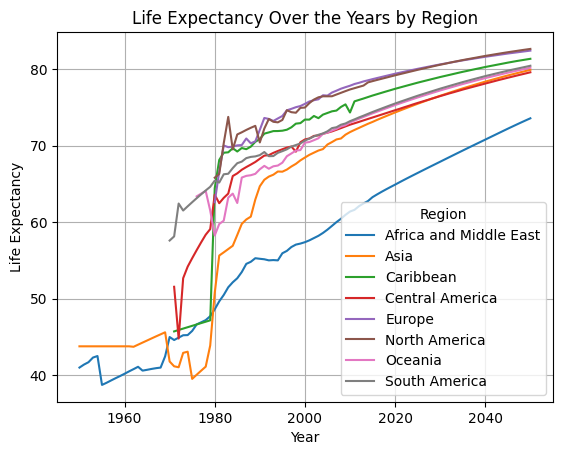

In [92]:

reigions = pop_changes_final.groupby(['region', 'year'])['life_expectancy'].mean().unstack(level=0)

plt.figure(figsize=(10, 6))
grouped.plot(kind='line')

plt.title('Life Expectancy Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Region')
plt.grid(True)


In [55]:
# Average Life expectancy of countries over time, ranked (using only  real data)
country_life = data.groupby(['country_name'])['life_expectancy'].describe()['mean'].sort_values(ascending=False)
country_life

country_name
Monaco          87.756786
Macau           82.881111
San Marino      82.170000
Japan           81.872500
Andorra         81.472857
                  ...    
Mozambique      45.262105
Niger           45.186829
Sierra Leone    45.040455
Afghanistan     44.776154
Chad            42.669444
Name: mean, Length: 228, dtype: float64

In [52]:
# Average Life expectancy of countries over time, ranked (using only projections)
country_life_pred = predictions.groupby(['country_name'])['life_expectancy'].describe()['mean'].sort_values(ascending=False)
country_life_pred

country_name
Japan            88.866667
Singapore        88.823636
Monaco           88.580909
Macau            84.843030
San Marino       84.015758
                   ...    
Swaziland        57.392424
Botswana         57.265758
Guinea-Bissau    57.248182
Chad             57.043030
Gabon            56.325758
Name: mean, Length: 228, dtype: float64

In [54]:
# Average Life expectancy of countries over time, ranked (using both real data and projections)
total_life = pop_changes_final.groupby('country_name')['life_expectancy'].mean().sort_values(ascending=False)
total_life

country_name
Monaco           88.202623
Japan            85.656230
Singapore        84.992787
Macau            83.960167
San Marino       83.257679
                   ...    
Somalia          52.375000
Guinea-Bissau    51.275833
Afghanistan      51.010556
Nigeria          50.884796
Chad             48.121494
Name: life_expectancy, Length: 228, dtype: float64

### Exploring Birth and Growth Rate

In [78]:
# Average Growth Rate of countries over time, ranked (using only  real data)
data.groupby(['country_name'])['growth_rate'].describe()['mean'].sort_values(ascending=False)

country_name
Qatar                       5.805813
Turks and Caicos Islands    5.556214
South Sudan                 4.640300
United Arab Emirates        4.606094
Western Sahara              4.029292
                              ...   
Lithuania                  -0.922276
Latvia                     -1.107138
Northern Mariana Islands   -1.202500
Montserrat                 -2.556630
Cook Islands               -2.637741
Name: mean, Length: 228, dtype: float64

In [93]:
# Average Life expectancy of countries over time, ranked (using only projections)
predictions.groupby(['country_name'])['life_expectancy'].describe()['mean'].sort_values(ascending=False)


country_name
Japan            88.866667
Singapore        88.823636
Monaco           88.580909
Macau            84.843030
San Marino       84.015758
                   ...    
Swaziland        57.392424
Botswana         57.265758
Guinea-Bissau    57.248182
Chad             57.043030
Gabon            56.325758
Name: mean, Length: 228, dtype: float64

### Exploring Mortality Rates

In [ ]:
plt.plot('year' '